#### Coaches Data

In [42]:
# imports
import pandas as pd
import numpy as np
import statistics
from sklearn.impute import SimpleImputer
import matplotlib.style as style 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [24]:
# read coaches csv file
coach = pd.read_csv('data/Coaches.csv')

In [26]:
# see coaches of Pittsburgh Penguins
coach_pit = coach.loc[coach['tmID'] == 'PIT']
coach_pit.head()

,coachID,year,tmID,lgID,stint,notes,g,w,l,t,postg,postw,postl,postt
45,angotlo01c,1983,PIT,NHL,1,NaN,80.0,16.0,58.0,6.0,NaN,NaN,NaN,NaN
111,berrybo01c,1984,PIT,NHL,1,NaN,80.0,24.0,51.0,5.0,NaN,NaN,NaN,NaN
112,berrybo01c,1985,PIT,NHL,1,NaN,80.0,34.0,38.0,8.0,NaN,NaN,NaN,NaN
113,berrybo01c,1986,PIT,NHL,1,NaN,80.0,30.0,38.0,12.0,NaN,NaN,NaN,NaN
138,boilema01c,1973,PIT,NHL,2,NaN,28.0,14.0,10.0,4.0,NaN,NaN,NaN,NaN


In [36]:
# filter out data between 1984 and 2005
coach_pit = coach_pit.loc[coach_pit['year'] >= 1984]
coach_pit = coach_pit.loc[coach_pit['year'] <= 2005]
coach_pit = coach_pit.loc[coach_pit['stint'] == 1]
coach_pit = coach_pit.sort_values(by='year', ascending=True)
coach_pit

,coachID,year,tmID,lgID,stint,notes,g,w,l,t,postg,postw,postl,postt,w/g,l/g
111,berrybo01c,1984,PIT,NHL,1,NaN,80.0,24.0,51.0,5.0,NaN,NaN,NaN,NaN,0.300000,0.637500
112,berrybo01c,1985,PIT,NHL,1,NaN,80.0,34.0,38.0,8.0,NaN,NaN,NaN,NaN,0.425000,0.475000
113,berrybo01c,1986,PIT,NHL,1,NaN,80.0,30.0,38.0,12.0,NaN,NaN,NaN,NaN,0.375000,0.475000
342,creampi01c,1987,PIT,NHL,1,NaN,80.0,36.0,35.0,9.0,NaN,NaN,NaN,NaN,0.450000,0.437500
1732,ubriage01c,1988,PIT,NHL,1,NaN,80.0,40.0,33.0,7.0,11.0,7.0,4.0,0.0,0.500000,0.412500
1733,ubriage01c,1989,PIT,NHL,1,NaN,26.0,10.0,14.0,2.0,NaN,NaN,NaN,NaN,0.384615,0.538462
755,johnsbo02c,1990,PIT,NHL,1,NaN,80.0,41.0,33.0,6.0,24.0,16.0,8.0,0.0,0.512500,0.412500
195,bowmasc01c,1991,PIT,NHL,1,NaN,80.0,39.0,32.0,9.0,21.0,16.0,5.0,0.0,0.487500,0.400000
196,bowmasc01c,1992,PIT,NHL,1,NaN,84.0,56.0,21.0,7.0,12.0,7.0,5.0,0.0,0.666667,0.250000
760,johnsed01c,1993,PIT,NHL,1,NaN,84.0,44.0,27.0,13.0,6.0,2.0,4.0,0.0,0.523810,0.321429


**First Coaches:**

    - 1984 - 1986 Bob Berry
    
    - 1987 Pierre Creamer
    
    - 1988 - 1989 Gene Ubriaco
    
    - 1990 Bob Johnson
    
    - 1991 - 1992 Scotty Bowman
    
    - 1993 - 1996 Eddie Johnston
    
    - 1997 - 1999 Kevin Constantine
    
    - 2000 - 2001 Ivan Hlinka
    
    - 2002 Rick Kehoe
    
    - 2003, 2005 Ed Olczyk
    
    

In [32]:
# engineer a column wins / games
pd.options.mode.chained_assignment = None  # default='warn'
coach_pit['w/g'] = coach_pit.apply(lambda x: x['w'] if x['w'] < 1 else x['w']/x['g'], axis=1)

In [33]:
# engineer a column of losses / games
pd.options.mode.chained_assignment = None  # default='warn'
coach_pit['l/g'] = coach_pit.apply(lambda x: x['l'] if x['l'] < 1 else x['l']/x['g'], axis=1)

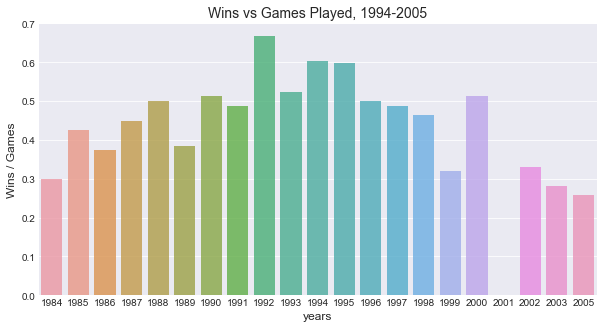

In [48]:
# construct wins / games chart
style.use('seaborn-darkgrid')
style.use('seaborn-muted')
sns.set_palette(sns.dark_palette('#69d', 10))
plt.figure(figsize=(10,5))
sns.barplot(data=coach_pit, x="year", y="w/g", alpha=0.8)
plt.title('Wins vs Games Played, 1994-2005', fontsize=14)
plt.xlabel('years', fontsize=12)
plt.ylabel('Wins / Games', fontsize=12)
plt.show
plt.savefig('charts/WinsVsGames_coach');

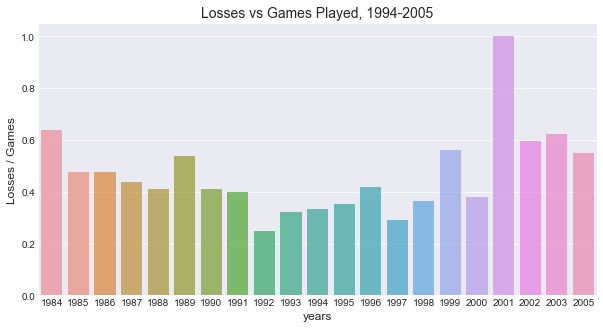

In [49]:
# construct losses / games chart
style.use('seaborn-darkgrid')
style.use('seaborn-muted')
sns.set_palette(sns.dark_palette('#69d', 10))
plt.figure(figsize=(10,5))
sns.barplot(data=coach_pit, x="year", y="l/g", alpha=0.8)
plt.title('Losses vs Games Played, 1994-2005', fontsize=14)
plt.xlabel('years', fontsize=12)
plt.ylabel('Losses / Games', fontsize=12)
plt.show
plt.savefig('charts/LossVsGames_coach');

In [12]:
# average wins per game
statistics.mean(coach_pit['w']/coach_was['g'])

0.4985007440025433

In [13]:
# average losses per game
statistics.mean(coach_was['l']/coach_was['g'])

0.3868535414117181

In [15]:
# average ties per game
statistics.mean(coach_was['t']/coach_was['g'])

0.11464571458573858